# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k + 1] = (1 + dt * lam) * y[k]
    return tt, y

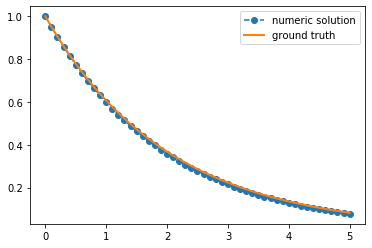

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.show()

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

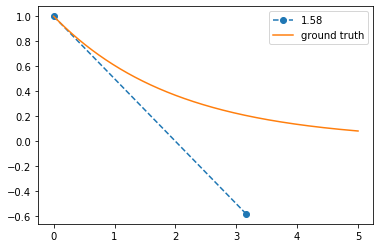

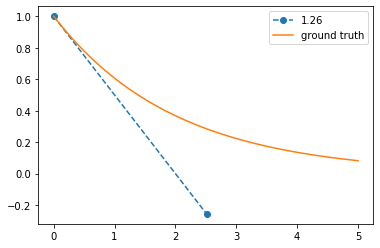

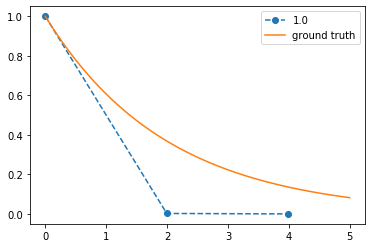

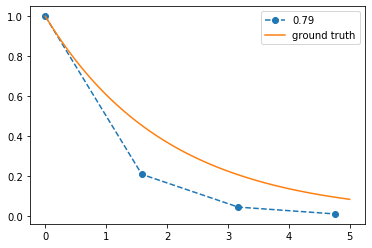

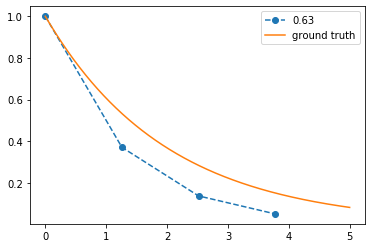

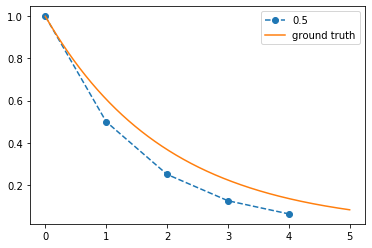

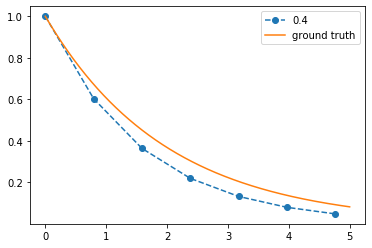

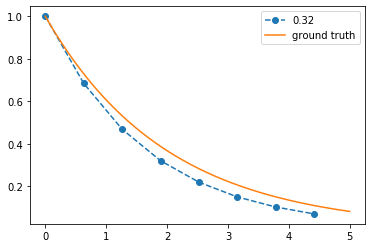

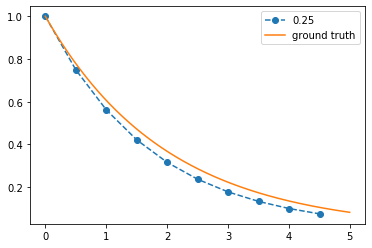

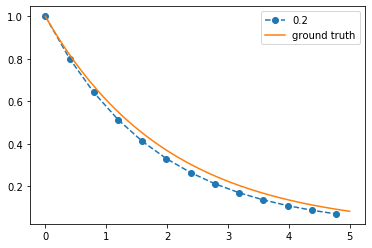

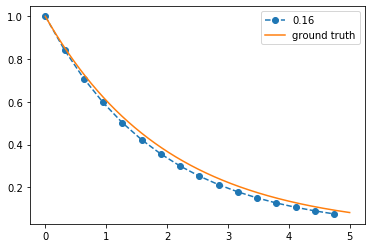

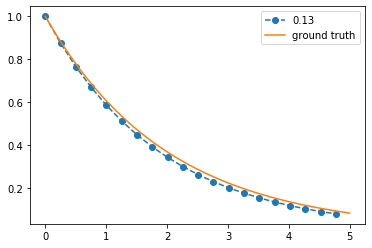

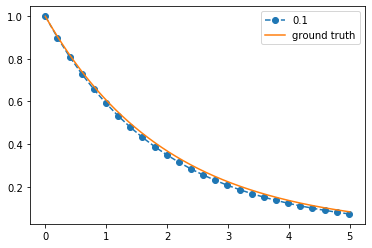

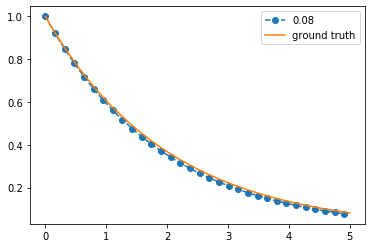

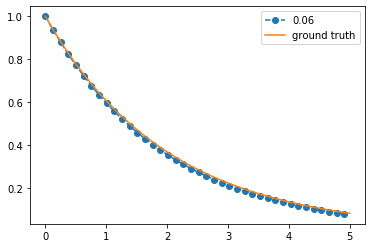

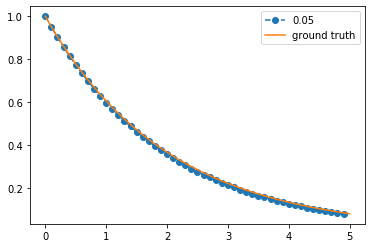

In [5]:
tau = np.power(np.full(16, 0.1), np.arange(-0.5, 1.1, 0.1))
for tau_ in tau:
    tt, y = euler_solve(lam, 1.0, 5.0, tau_)
    tt_ = np.linspace(0.0, 5.0, 10 ** 4)
    plt.plot(tt, y, 'o--', label=round(tau_ * np.abs(lam), 2))
    plt.plot(tt_, np.exp(lam * tt_), '-', label='ground truth')
    plt.legend(loc='best')
    plt.show()
    
# Note: in legend, the value of lam * tau is shown.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [6]:
def eurler_implicit(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k + 1] = y[k] / (1 - dt * lam)
    return tt, y

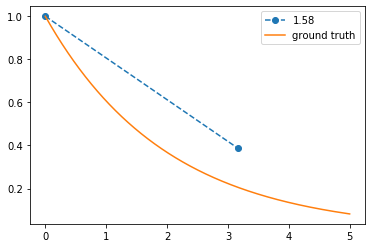

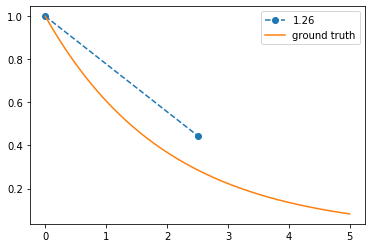

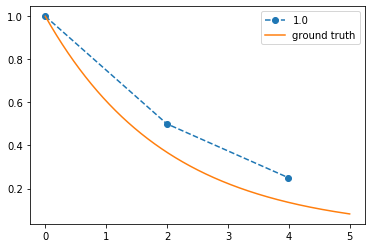

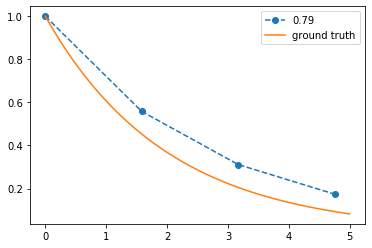

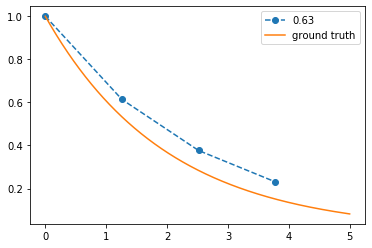

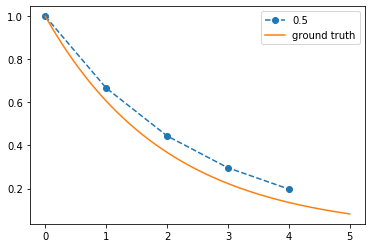

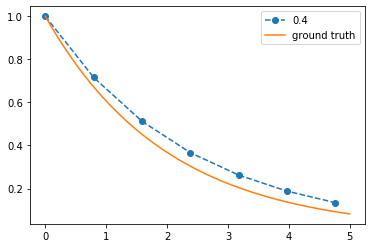

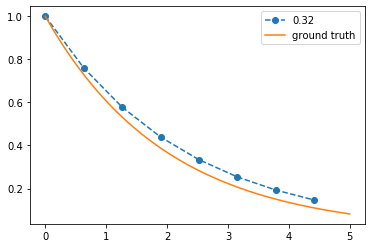

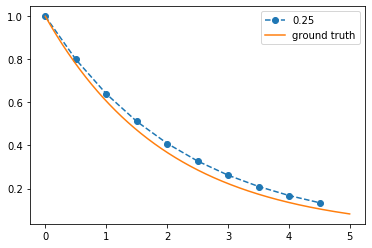

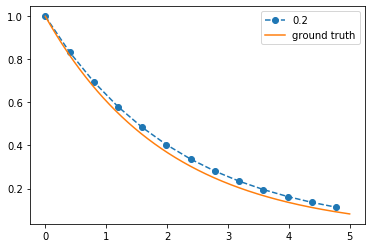

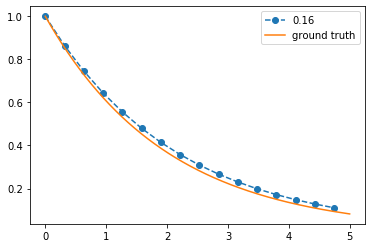

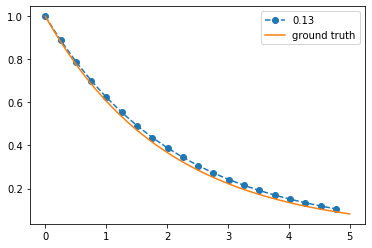

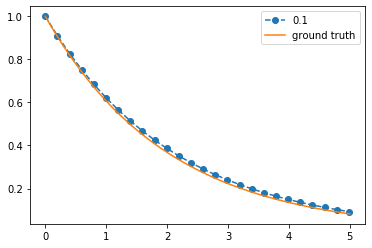

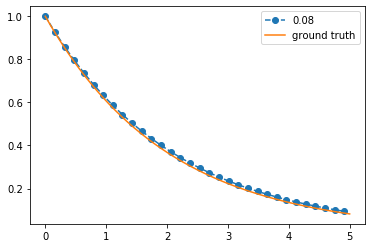

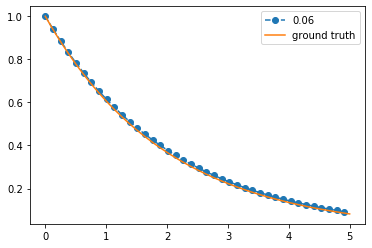

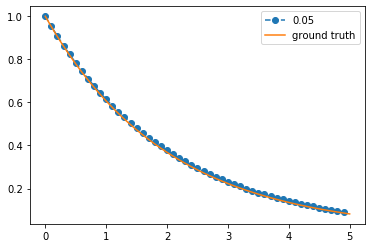

In [7]:
tau = np.power(np.full(16, 0.1), np.arange(-0.5, 1.1, 0.1))
for tau_ in tau:
    tt, y = eurler_implicit(lam, 1.0, 5.0, tau_)
    tt_ = np.linspace(0.0, 5.0, 10 ** 4)
    plt.plot(tt, y, 'o--', label=round(tau_ * np.abs(lam), 2))
    plt.plot(tt_, np.exp(lam * tt_), '-', label='ground truth')
    plt.legend(loc='best')
    plt.show()

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [8]:
def euler_system_solve(A, u0, T, dt):
    """Solve $du/dt = A @ u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    N = A.shape[0]
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, N])
    y[0, :] = u0
    for k in range(num_steps):
        y[k + 1, :] = (np.eye(N) + dt * A) @ y[k, :]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [9]:
A = np.asarray([[-10, 10], [32, -499]])
u0 = np.asarray([1, 0])
print(euler_system_solve(A, u0, 5.0, 0.01)[1])

# In this case, the solution blows up.

[[ 1.00000000e+000  0.00000000e+000]
 [ 9.00000000e-001  3.20000000e-001]
 [ 8.42000000e-001 -9.88800000e-001]
 ...
 [ 5.79760589e+296 -2.83881815e+298]
 [-2.31703362e+297  1.13454368e+299]
 [ 9.26010650e+297 -4.53424377e+299]]


In [10]:
lambda0, lambda1 = np.linalg.eigvals(A)
print(lambda0, lambda1)

# The stiffness ration lambda0 / lambda1 is fairly large.

-9.346476672269716 -499.6535233277303


### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [11]:
def euler_system_implicit(A, u0, T, dt):
    """Solve $du/dt = A @ u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    N = A.shape[0]
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, N])
    y[0, :] = u0
    for k in range(num_steps):
        y[k + 1, :] = np.linalg.solve(np.eye(N) - dt * A, y[k, :])
    return tt, y

[[1.00000000e+00 0.00000000e+00]
 [9.13527528e-01 4.88028062e-02]
 [8.35276830e-01 5.27698484e-02]
 ...
 [4.72752013e-20 3.08954469e-21]
 [4.32343161e-20 2.82546341e-21]
 [3.95388287e-20 2.58395469e-21]]


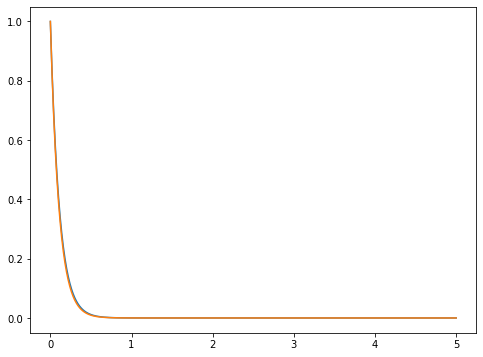

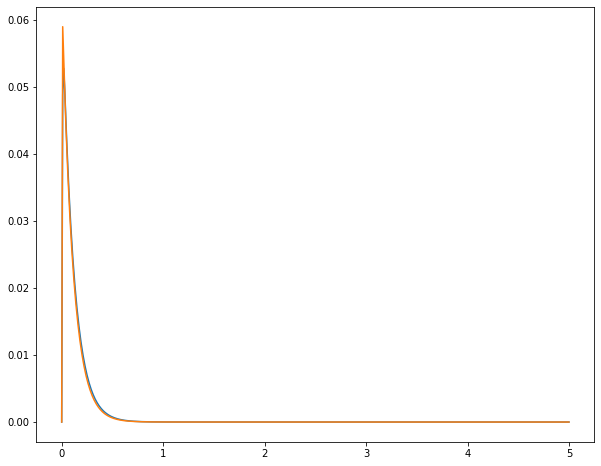

In [12]:
from scipy.linalg import expm

print(euler_system_implicit(A, u0, 5.0, 0.01)[1])
tt, y = euler_system_implicit(A, u0, 5.0, 0.01)
u = np.asarray([expm(A * t) @ u0 for t in tt])

plt.figure(figsize=(8, 6))
plt.plot(tt, y[:, 0])
plt.plot(tt, u[:, 0])
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(tt, y[:, 1])
plt.plot(tt, u[:, 1])
# plt.legend(loc='best')
plt.show()

In [11]:
# Implicit Euler method gives much more plausible results.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

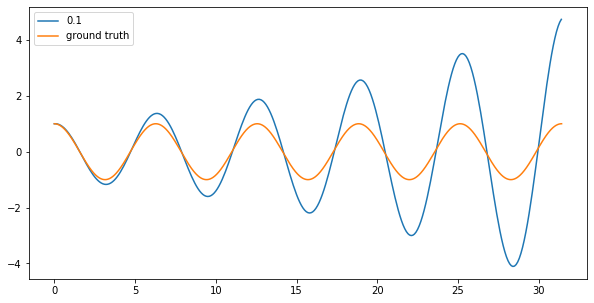

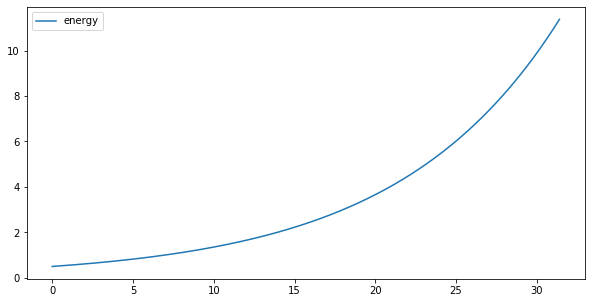

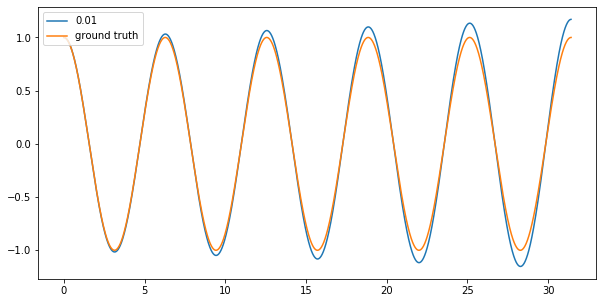

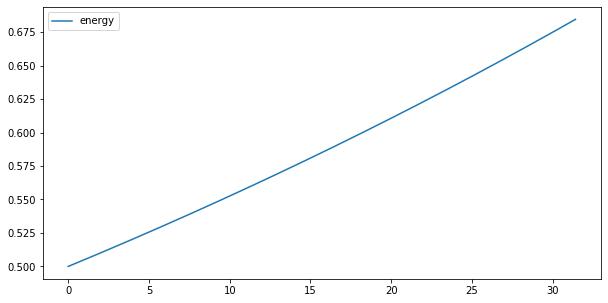

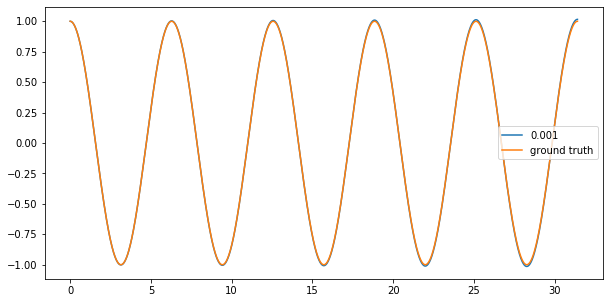

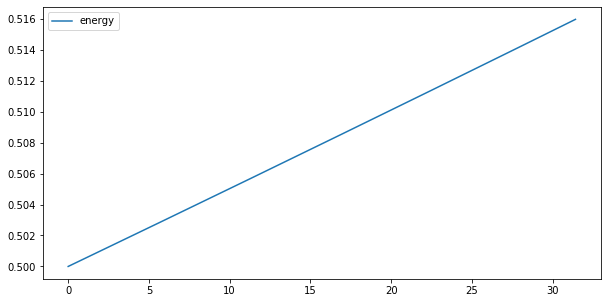

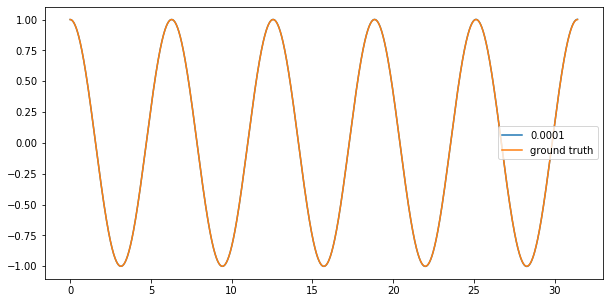

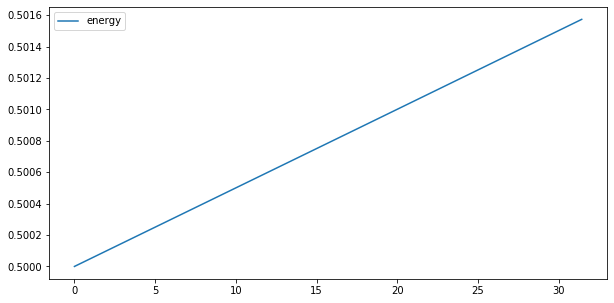

In [12]:
omega = 1
A = np.asarray([[0, 1], [- omega ** 2, 0]])
u0 = np.asarray([1, 0])
T = (2 * np.pi / omega) * 5

dt = np.power(np.full(4, 0.1), np.arange(1, 5, 1))
k = 0
for dt_ in dt:
    k += 1
    tt, y = euler_system_solve(A, u0, T, dt_)
    tt_ = np.linspace(0.0, T, 10 ** 4)
    plt.figure(figsize=(10, 5))
    plt.plot(tt, y[:, 0], label=round(dt_, k))
    plt.plot(tt_, np.cos(omega * tt_), '-', label='ground truth')
    plt.legend(loc='best')
    plt.show()
    E = [y[n, 1] ** 2 * 0.5 + omega ** 2 * y[n, 0] ** 2 * 0.5 for n in range(tt.shape[0])]
    plt.figure(figsize=(10, 5))
    plt.plot(tt, E, label='energy')
    plt.legend(loc='best')
    plt.show()

In [13]:
# There IS a small change in energy over time, so it is not fully conserved.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [14]:
def runge_kutta(A, u0, T, dt):
    """Solve $du/dt = A @ u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    N = A.shape[0]
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([num_steps + 1, N])
    y[0, :] = u0
    for k in range(num_steps):
        y_half = (np.eye(N) + dt * 0.5 * A) @ y[k, :]
        y[k + 1, :] = y[k, :] + dt * A @ y_half
    return tt, y

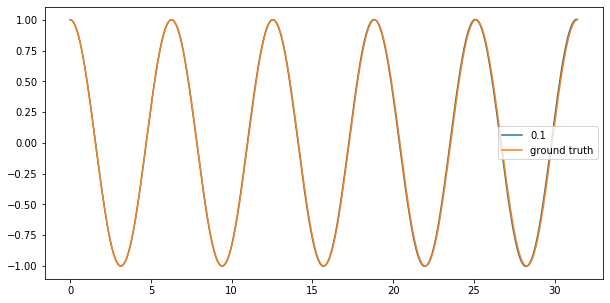

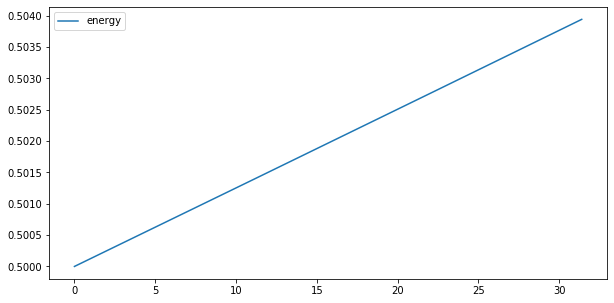

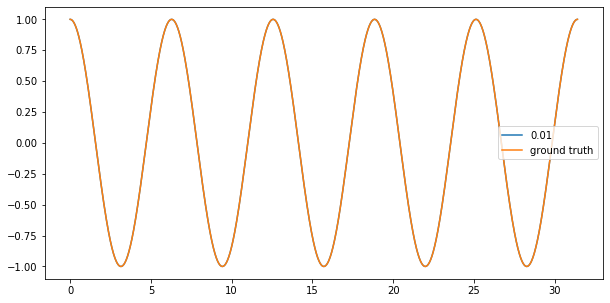

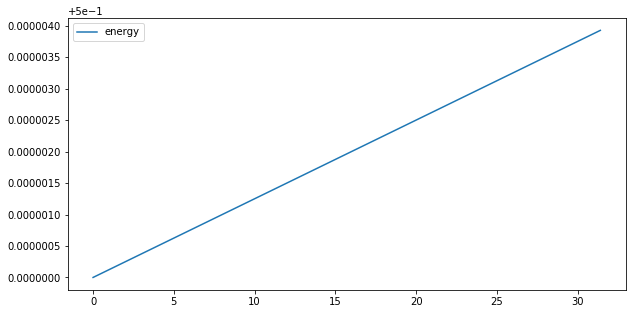

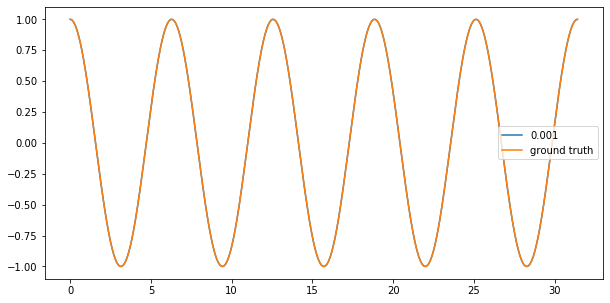

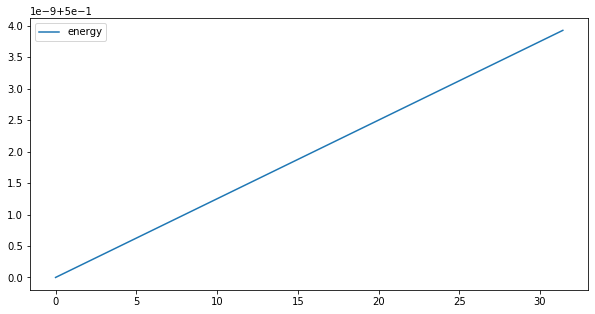

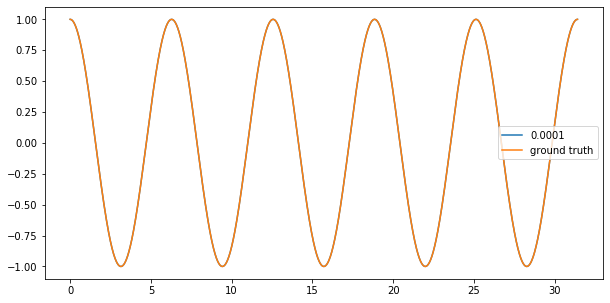

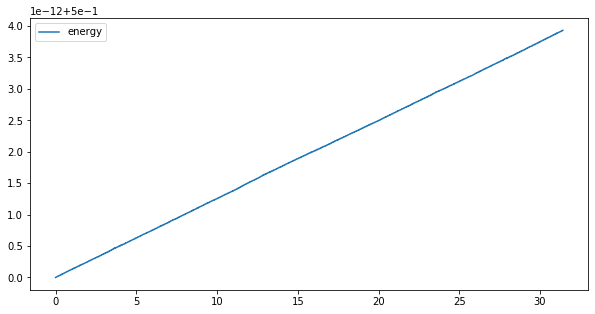

In [15]:
dt = np.power(np.full(4, 0.1), np.arange(1, 5, 1))
k = 0
for dt_ in dt:
    k += 1
    tt, y = runge_kutta(A, u0, T, dt_)
    tt_ = np.linspace(0.0, T, 10 ** 4)
    plt.figure(figsize=(10, 5))
    plt.plot(tt, y[:, 0], label=round(dt_, k))
    plt.plot(tt_, np.cos(omega * tt_), '-', label='ground truth')
    plt.legend(loc='best')
    plt.show()
    E = [y[n, 1] ** 2 * 0.5 + omega ** 2 * y[n, 0] ** 2 * 0.5 for n in range(tt.shape[0])]
    plt.figure(figsize=(10, 5))
    plt.plot(tt, E, label='energy')
    
    plt.legend(loc='best')
    plt.show()

In [16]:
# Runge-Kutta scheme converges faster and gives solutions preserving energy.